#                                          STATISTICS MINI PROJECT 

### Importing the required Libraries:

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats import weightstats as stests

from scipy import stats

import statistics

import random

from warnings import filterwarnings
filterwarnings('ignore')

from scipy.stats import chi2_contingency

from scipy.stats import shapiro


## 1. Perform the following statistical analysis on the fifa world cup dataset. The dataset consists of player                                  information, which includes height; weight overall rating, potential etc. Data Cleaning and basic EDA                         process needs to be performed. 

### Note: 
### i.) Perform all the Statistical analysis with 5% (Significance level). 

### ii.) Assume all the features are normally distributed and have equal variance.



In [6]:
dff = pd.read_csv("fifa_stats.csv")
dff.head(5)

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [24]:
dff.dtypes

Name                         object
Age                           int64
Nationality                  object
Overall_rating                int64
Potential                     int64
Club                         object
Preferred Foot               object
International Reputation      int64
Weak Foot                     int64
Skill Moves                   int64
Work Rate                    object
Position                     object
Jersey Number                 int64
Height                      float64
Weight                        int64
dtype: object

In [20]:
dff.isna().sum()

Name                         0
Age                          0
Nationality                  0
Overall_rating               0
Potential                    0
Club                        19
Preferred Foot               0
International Reputation     0
Weak Foot                    0
Skill Moves                  0
Work Rate                    0
Position                     0
Jersey Number                0
Height                       0
Weight                       0
dtype: int64

In [27]:
dff["Club"].mode()

0    Chelsea
dtype: object

### a)	Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

In [ ]:
# Cental limit theorem with sample size 200, mean and std. deviation :

In [206]:
def sample_mean_calculator(population_array):
    
    random.seed(500)
    
    std = []
    
    mean = []
    
    sample = random.sample(population_array, k=200)
    
    samp_std = statistics.stdev(sample)
    
    std.append(samp_std)
    
    samp_mean = np.mean(sample)
    
    mean.append(samp_mean)
    
    return "samp_std :", std, "sample mean :",mean

In [207]:
sample_mean_calculator(list(dff["Age"]))

('samp_std :', [4.012530624188463], 'sample mean :', [27.51])

In [ ]:
# Population mean and std. deviation :

In [204]:
print("Population std is", statistics.stdev(dff["Age"]) )
print("Population mean is", dff["Age"].mean())

Population std is 3.8590612753574516
Population mean is 27.2315


Standard error decreases when sample size increases – as the sample size near to the original size of the population, the sample means cluster more amnd more around the original population mean.

### b)	Is there any evidence that the players overall rating is greater than 80?

The null and alternative hypothesis is:

H<sub>0</sub>: $\mu \leq 80$ <br>
H<sub>1</sub>: $\mu > 80$ 

Here ⍺ = 0.05, for a one-tailed test calculate the critical z-value.

In [209]:
z_val = np.abs(round(stats.norm.isf(q = 0.05), 2))

print('Critical value for one-tailed Z-test:', z_val)

Critical value for one-tailed Z-test: 1.64


i.e. if z is greater than 1.64 then we reject the null hypothesis.

In [226]:
random.seed(10)

sample = random.sample(list(dff["Age"]), k=200)

n = dff["Age"].count()

pop_mean = dff["Age"].mean()

pop_std = statistics.stdev(dff["Age"])
                           
samp_mean = np.mean(sample)

z_score = (samp_mean - pop_mean) / (pop_std / np.sqrt(n))

print("Z-score:", z_score)

Z-score: 3.806875704717274


Here, Z_score is greater than 1.64 then we reject the null hypothesis. So, we conclude that players overall rating is greater than 80

### c)	Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.




In [237]:
right = dff[(dff['Preferred Foot'] == 'Right')]['Potential']

n1 = len(right)
 
n1_mean = np.mean(right)
 
n1_std = statistics.stdev(right)

left = dff[(dff['Preferred Foot'] == 'Left')]['Potential']

n2 = len(left)
 
n2_mean = np.mean(left)

n2_std = statistics.stdev(left)

In [239]:
z_score, pval = stests.ztest(x1 = right, x2 = left)

print("Z-score: ", z_score)
print("p-value: ", pval)

Z-score:  -1.5378037422592814
p-value:  0.1240966083204813


Here the the p-value is greater than 0.05, thus we fail to reject (i.e. accept) the null hypothesis and we do not have enough evidence to identify whether preferred foot has any impact on potential

In [283]:
# Graphical Analysis :

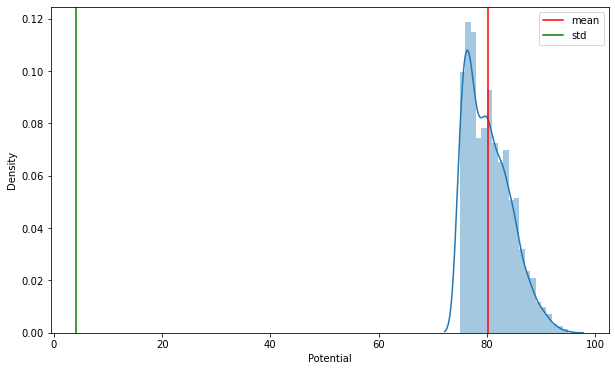

In [282]:
plt.figure(figsize = (10,6))
sns.distplot(right)
plt.axvline(right.mean(), label="mean", color="red")
plt.axvline(statistics.stdev(right), label = "std", color="green")
plt.legend()
plt.show()

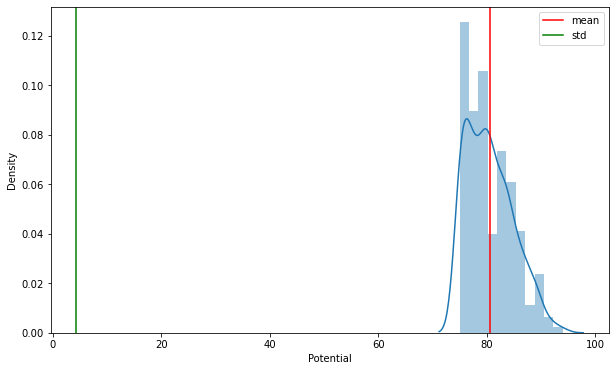

In [280]:
plt.figure(figsize = (10,6))
sns.distplot(left)
plt.axvline(left.mean(), label="mean", color="red")
plt.axvline(statistics.stdev(left), label = "std", color="green")
plt.legend()
plt.show()

### d)	Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].



In [285]:
dff.head(2)

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183


The null and alternative hypothesis is:

H<sub>0</sub>: The variables overall rating and potential are independent<br>
H<sub>1</sub>: The variables overall rating and potential are not independent

In [308]:
table = pd.crosstab(dff['Overall_rating'], dff['Potential'])
 
observed_value = table.values

n = len(observed_value[0])
n

21

For ⍺ = 0.05 and degrees of freedom = 20 , calculate the critical value.

In [63]:
test_stats, p, dof, exp_val = chi2_contingency(observed = observed_value, correction = False)

print("p-value:", round(p,2))

p-value: 0.48


Here, the p-value is less than 0.05, thus we reject the null hypothesis and conclude that the variables `overall rating` and `potential` are dependent.

### e)	Does skill move have any effect in overall rating? Perform the graphical analysis and the statistical analysis.


The null and alternative hypothesis is:

H<sub>0</sub>: The variable Skill Moves doesnot effect on  overall rating <br>
H<sub>1</sub>: The variable Skill Moves effect on  overall rating

In [343]:
table = pd.crosstab(dff['Overall_rating'], dff['Skill Moves'])
 
observed_value = table.values

n = len(observed_value[0])
n

5

For ⍺ = 0.05 and degrees of freedom = 4 , calculate the critical value.

In [344]:
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 4), 2))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 9.49


i.e. if the chi-square value is greater than 9.49 then we reject the null hypothesis.

In [350]:
test_stats, p, dof, exp_val = chi2_contingency(observed = observed_value, correction = False)

print("test_statistics:",test_stats)
print("p-value:", round(p,2))

test_statistics: 264.3544361441865
p-value: 0.0


The above output shows that the chi-square test statistic is greater than 11.0705, we fail the null hypothesis and conclude that the variable Skill Moves doesnot effect on  overall rating

## 2. Perform the following statistical analysis on the mobile network dataset given. The given data set contains information about the internet, calls, and messages of various network. Data Cleaning and basic EDA process needs to be performed. 

### Note: 
### 1) Perform all the Statistical analysis with 5% (Significance level). 

### 2) Perform the test of normality and test of variance in the appropriate places.


In [5]:
dfp = pd.read_csv("phone.csv")
dfp.head(5)

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [21]:
dfp.isna().sum()

date            0
duration        0
item            0
month           0
network         0
network_type    0
dtype: int64

In [23]:
dfp.dtypes

date             object
duration        float64
item             object
month            object
network          object
network_type     object
dtype: object

In [352]:
dfp["date"]= pd.to_datetime(dfp["date"])

In [359]:
dfp['month'] = pd.to_datetime(dfp['month'],format='%Y-%m', errors='coerce')

In [360]:
dfp.dtypes

date            datetime64[ns]
duration               float64
item                    object
month           datetime64[ns]
network                 object
network_type            object
dtype: object

### a) With 95% & 99% Confidence Interval, find the range estimate of average duration calls made by the entire network. Which of the Intervals are wider? Interpret the results.


In [361]:
dfp.head(2)

,date,duration,item,month,network,network_type
0,2014-10-15 06:58:00,221.321120,data,2014-11-01,data,data
1,2014-10-15 06:58:00,81.610599,call,2014-11-01,Vodafone,mobile


In [ ]:
# 95 % Confidence Interval :

In [7]:
n1 = len(dfp["duration"])

std_pop1 = statistics.stdev(dfp["duration"])

interval1 = stats.norm.interval(0.95, loc = np.mean(dfp["duration"]), scale = std_pop1 / np.sqrt(n1))

print('The 90% confidence interval of population mean is', np.round(interval1,2))

The 90% confidence interval of population mean is [141.18 147.43]


In [15]:
print("difference between 95% Confidence interval : ", round((interval1[-1]-interval1[0]),2))

difference between the 95% Confidence interval :  6.25


In [ ]:
# 90 % Confidence Interval :

In [8]:
n2 = len(dfp["duration"])

std_pop2 = statistics.stdev(dfp["duration"])

interval2 = stats.norm.interval(0.99, loc = np.mean(dfp["duration"]), scale = std_pop2 / np.sqrt(n2))

print('The 90% confidence interval of population mean is', np.round(interval2,2))

The 90% confidence interval of population mean is [140.2  148.41]


In [17]:
print("difference between 99% Confidence interval : ", round((interval2[-1]-interval2[0]),2))

difference between 99% Confidence interval :  8.22


Based on the above outputs, 99% Confidence interval is wider than 95%

### b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.


In [18]:
dfp.head(2)

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile


In [31]:
network = pd.crosstab(dfp["network"], columns="no. of network")

In [33]:
stat, p_value = shapiro(network)

print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.8885776400566101
P-Value: 0.26732590794563293


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the network in the dataset are normally distributed.

### c) Plot the distribution of duration with respect to each network in the same graph and interpret the results from the graph.


In [45]:
dfp.head(2)

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile


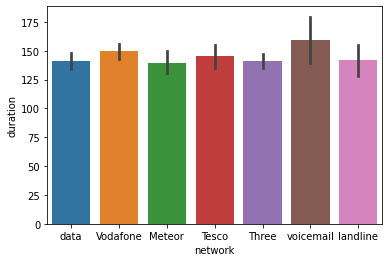

In [52]:
sns.barplot(x=dfp["network"], y=dfp["duration"])
plt.show()

From the above graph, "voicemail" network has the highest duration and "meteor" has the lowest duration when compared to others

### d)	Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.


In [53]:
dfp.head(2)

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile


The null and alternative hypothesis is:

H<sub>0</sub>: The variables item and duration are independent<br>
H<sub>1</sub>: The variables item and duration are not independent

In [60]:
table = pd.crosstab(dfp['item'], dfp['duration'])

observed_value = table.values

n = len(observed_value[0])

n

820

For ⍺ = 0.05 and degrees of freedom = 819 , calculate the critical value.

In [66]:
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 819), 2))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 886.69


i.e. if the chi-square value is greater than 886.69 then we reject the null hypothesis.

In [100]:
test_stats, p, dof, exp_val = chi2_contingency(observed = observed_value, correction = False)

print("test_stats:", test_stats)

print("p-value:", round(p,2))

test_stats: 1640.0
p-value: 0.48


The above output shows that the chi-square test statistic is greater than 886.69 thus we reject the null hypothesis and conclude that the no relation between two variables

### e)	Perform statistical tests to identify the relation between network and network_type. 


In [70]:
dfp.head(2)

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile


The null and alternative hypothesis is:

H<sub>0</sub>: The variables network and network_type are independent<br>
H<sub>1</sub>: The variables network and network_type are not independent

In [102]:
table = pd.crosstab(dfp['network'], dfp['network_type'])

observed_value = table.values

n = len(observed_value[0])

n

4

In [104]:
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 3), 2))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 7.81


In [107]:
test_stats, p, dof, exp_val = chi2_contingency(observed = observed_value, correction = False)

print("test_stats:", test_stats)

print("p-value:", round(p,2))


test_stats: 2460.0
p-value: 0.0


The above output shows that the chi-square test statistic is greater than 7.81 thus we reject the null hypothesis and conclude that the no relation between two variables